# Статистическая обработка временных рядов
## Лабораторная 1.

([<matplotlib.axis.YTick at 0x7f1be76b96f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

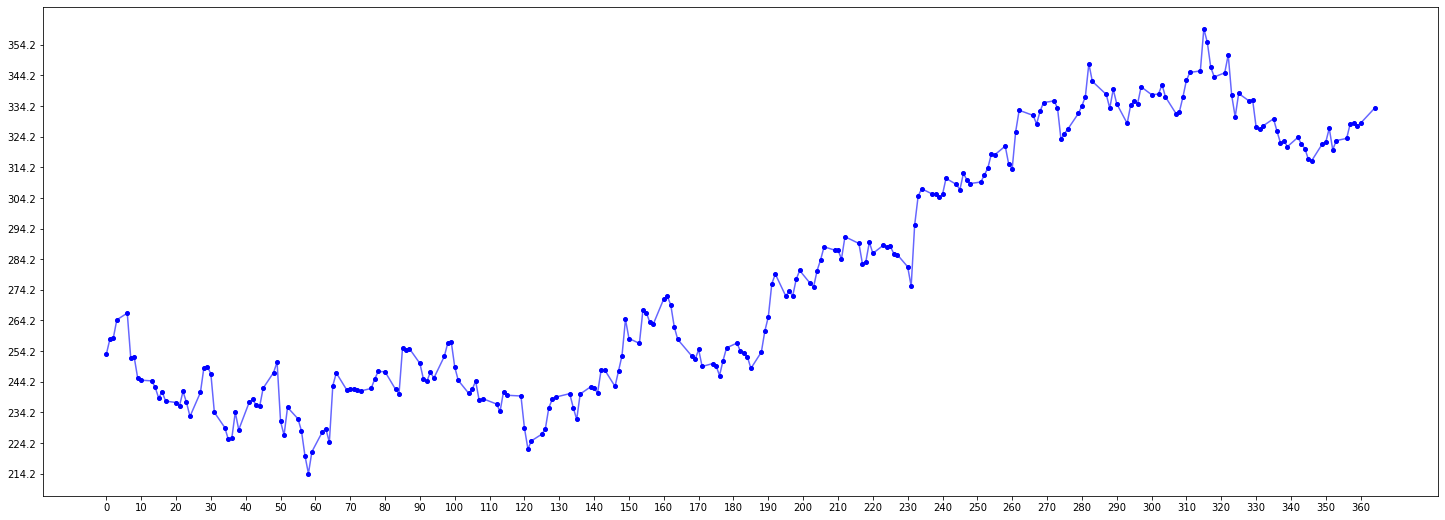

In [159]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from time import mktime
from datetime import datetime

df = pd.read_csv('MSFT.csv', parse_dates = True)
days = [datetime.fromtimestamp(mktime(time.strptime(df['Date'][i], '%Y-%m-%d'))) for i in range(df.shape[0])]
days_by_ind = [(days[i] - days[0]).days for i in range(df.shape[0])]
sales = pd.DataFrame(data = {'Day': days_by_ind, 'Close': df['Close']})

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 9))
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'ob', alpha = 1, markersize = 4)
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'b', alpha = 0.6)
plt.xticks(np.arange(0, max(days_by_ind), 10))
plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10))

## 1. Первичный анализ
 С целью большего удобства визуального анализа графика временного ряда было принято решение преобразовать даты к виду порядкого номера дня, за который приведена отчётность в таблице. То, что торги не производятся по выходным дням, так же было учтено. 
 О сезонности временного ряда можно говорить приблизительно в первые 260-270 дней продаж, начиная с нулевого дня. В период каждые 60 дней ряд достигал локального экстремума, постепенно снижая свои значения при приближении к этим точкам. Но по истечении указанного выше срока колебания хоть и были, но менее значительны, причём в целом величина росла до 330-го дня с начала ведения отчётности. Впоследствии происходило некоторое падение, но к последнему дню наблюдений ряд снова начал расти. На основании того, что ряд начал расти, а кроме того, что последнее его падение было меньшим, чем в предыдущие приоды, можно сделать следующее предположение о тренде: скорее всего ряд продолжит возрастать, возможно с некоторыми колебаниями.

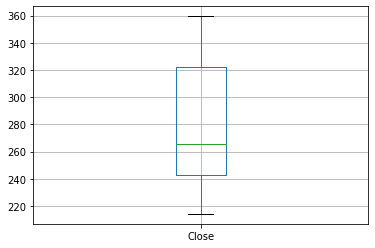

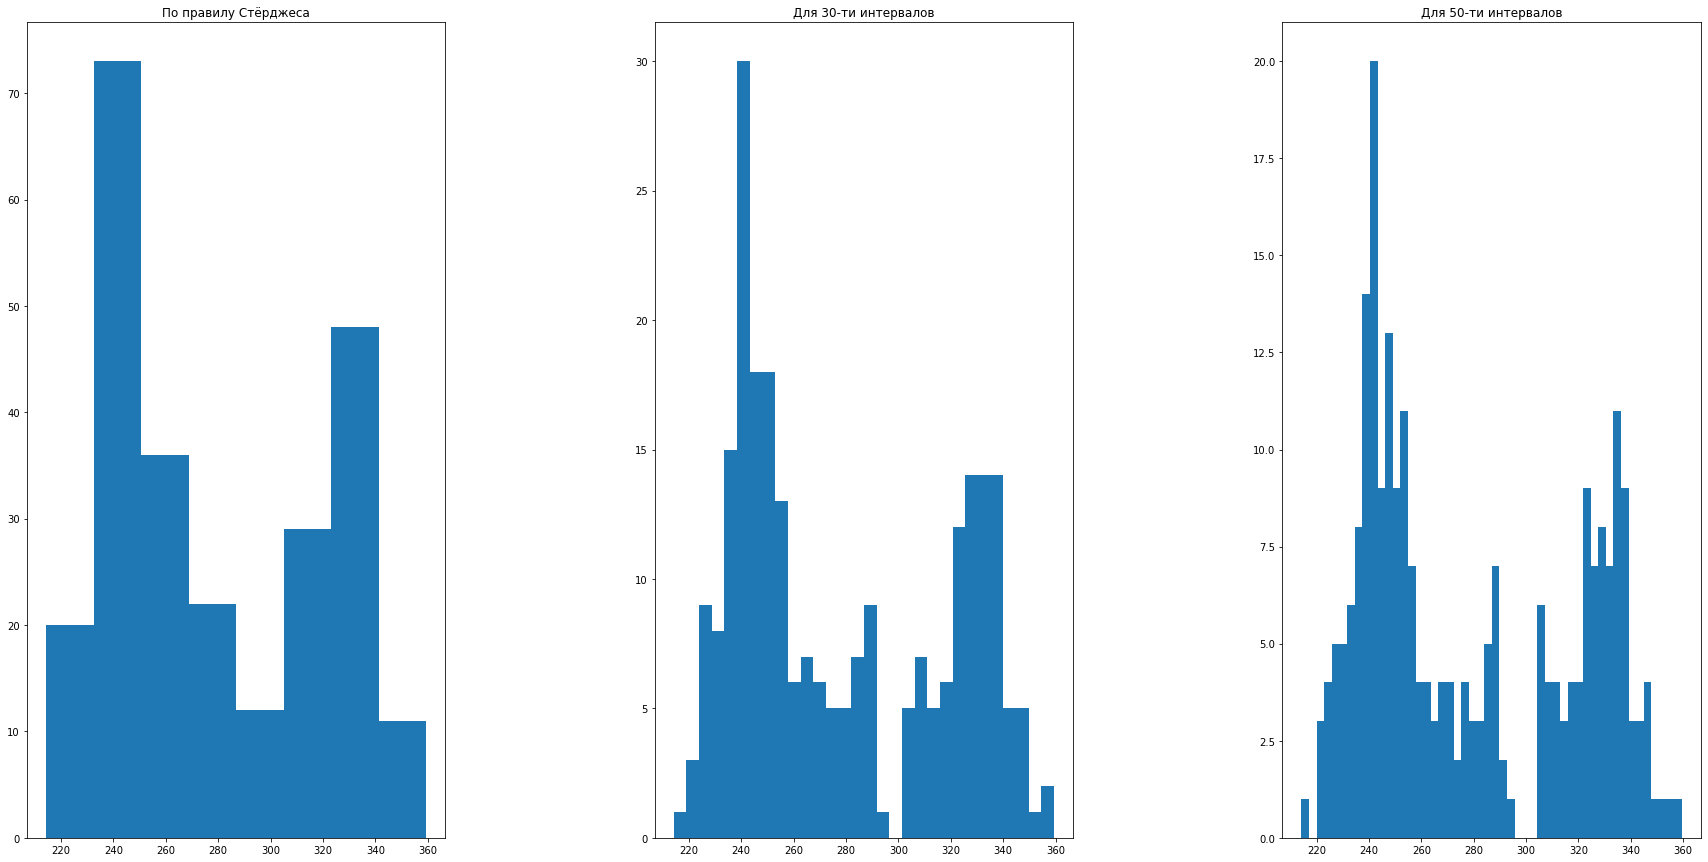

In [102]:
import math

sales.boxplot(column = 'Close', whis=1.5)
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=False, figsize=(30, 15))

axs[0].hist(sales['Close'], bins = int(math.log2(sales.shape[0]) + 1))
axs[1].hist(sales['Close'], bins=30)
axs[2].hist(sales['Close'], bins=50)
axs[0].set_title('По правилу Стёрджеса')
axs[1].set_title('Для 30-ти интервалов')
axs[2].set_title('Для 50-ти интервалов')
plt.subplots_adjust(wspace = 0.5)

In [110]:
Xmean = df['Close'].mean()
Sq = df['Close'].std()
Var = Sq / Xmean
Median = df['Close'].median()
print("Среднее выборочное:  ", Xmean)
print("Среднее квадратическое:  ", Sq)
print("Вариация:  ", Var)
print("Медиана:  ", Median)



Среднее выборочное:   278.9245415976096
Среднее квадратическое:   40.26863222389456
Вариация:   0.14437106176905756
Медиана:   265.440002


## 2. Были получены следующие статистические характеристики временного ряда:
Среднее выборочное:  278.9245

Среднее квадратическое:  40.2686

Вариация:  0.1444

Медиана:  265.4400

## 3. Стационарность
 Данный ряд сложно назвать стационарным, так как он по меньшей мере возрастает, следовательно изменяется его среднее выборочное. 
 Так же нас интересует АКФ(ф-ция автокорреляции). Данная функция в общем случае для некотрого сигнала имеет следующий вид <tex>$$\int\limits_{-\infty}^{\infty} f(t) * f(t - \tau)\,dt$$</tex> .
 Чтобы ряд был стационарен, необходимо также выполнение того требования, чтобы АКФ была постоянна, то есть чтобы существовал некоторый период для функции f(t) исследуемого временного ряда. В случае с рядом, рассматриваемым в данной лабораторной работе нельзя однозначно говорить, что он удовлетворяет такому условию. Ну визуально, тем не менее, можно предположить, что он имеет в себе некоторую линейную по t составляющую, которая вносит нестационарность. Ниже на графике представлена синяя кривая - интерполяция полученных из таблицы точек, и оранжевая, полученная вычитанием из неё линейной по t функции с подобранным коэффициентом. 

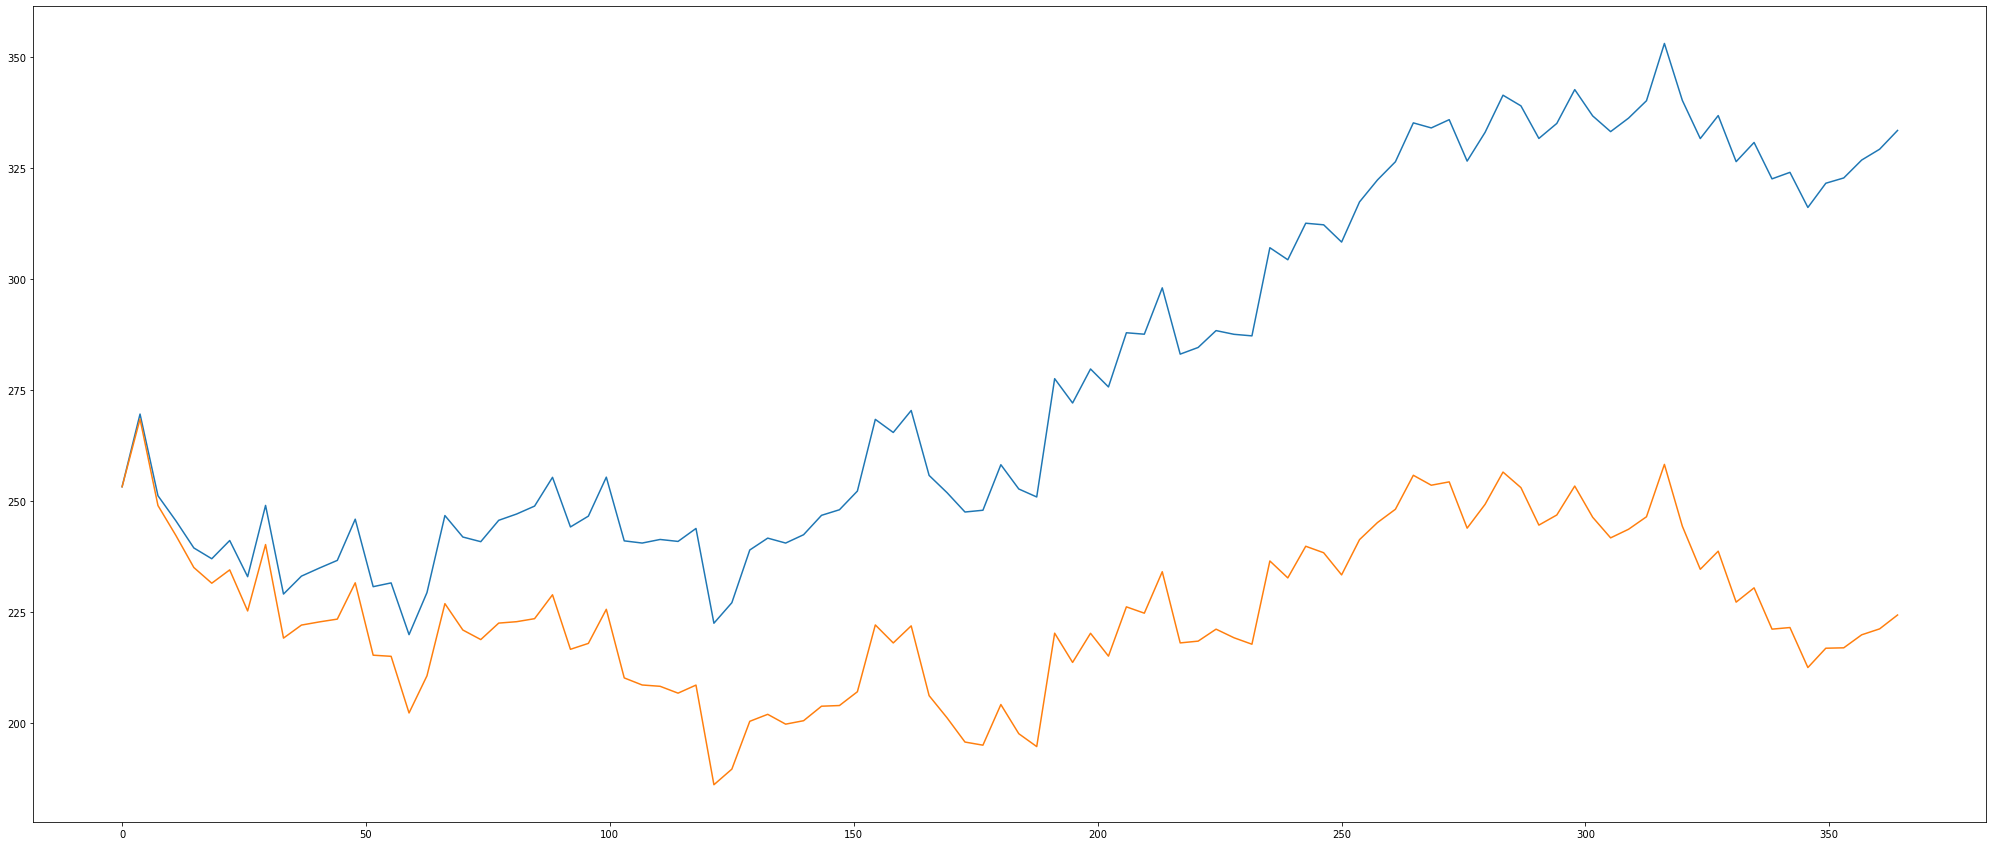

In [153]:
from scipy import interpolate

N = 100
interp = interpolate.splrep(sales['Day'], sales['Close'], s = 0)
x = np.linspace(0, max(days_by_ind), N)
plt.figure(figsize=(35, 15))
plt.plot(x, interpolate.splev(x, interp, der = 0))
plt.plot(x, interpolate.splev(x, interp, der = 0) - 0.3 * x)